In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data_set=pd.read_csv("insurance.csv")
data_set.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [3]:
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


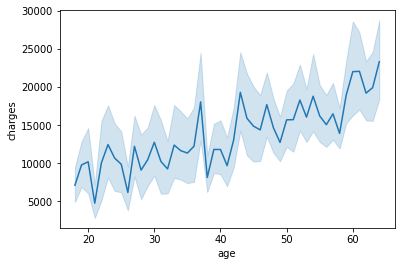

In [4]:
sns.lineplot(x="age",y="charges",data=data_set)
plt.show()

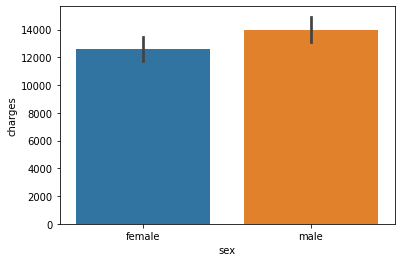

In [11]:
sns.barplot(y="charges",x="sex",data=data_set)
plt.show()

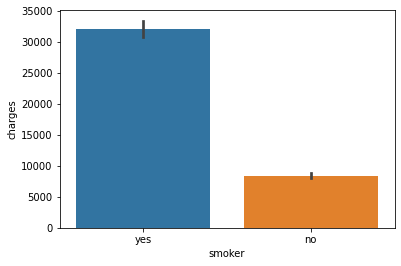

In [9]:
sns.barplot(x="smoker",y="charges",data=data_set)
plt.show()

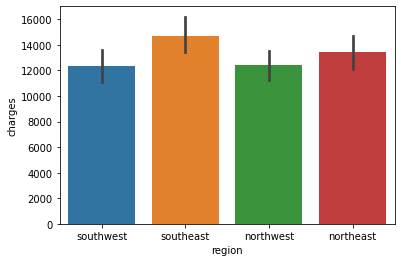

In [10]:
sns.barplot(x="region",y="charges",data=data_set)
plt.show()

In [12]:
from sklearn.preprocessing import LabelEncoder
sex_encoder=LabelEncoder()
data_set["sex"]=sex_encoder.fit_transform(data_set["sex"].values)
smoker_encoder=LabelEncoder()
data_set["smoker"]=smoker_encoder.fit_transform(data_set["smoker"].values)
region_encoder=LabelEncoder()
data_set["region"]=region_encoder.fit_transform(data_set["region"].values)

In [13]:
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int32  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int32  
 5   region    1338 non-null   int32  
 6   charges   1338 non-null   float64
dtypes: float64(2), int32(3), int64(2)
memory usage: 57.6 KB


In [14]:
data_set.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
5,31,0,25.740,0,0,2,3756.62160
6,46,0,33.440,1,0,2,8240.58960
7,37,0,27.740,3,0,1,7281.50560
8,37,1,29.830,2,0,0,6406.41070
9,60,0,25.840,0,0,1,28923.13692


In [50]:
x=data_set.iloc[:,:-1].values
y=data_set.iloc[:,-1].values
y=y.reshape(len(y),1)

In [51]:
from sklearn.preprocessing import StandardScaler
sc_x=StandardScaler()
sc_y=StandardScaler()
x=sc_x.fit_transform(x)
y=sc_y.fit_transform(y)

In [52]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

## Linear regression

In [31]:
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()
lin_reg.fit(x_train,y_train)

LinearRegression()

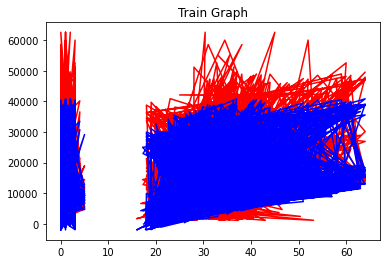

In [32]:
plt.plot(sc_x.inverse_transform(x_train),sc_y.inverse_transform(y_train),"r")
plt.plot(sc_x.inverse_transform(x_train),sc_y.inverse_transform(lin_reg.predict(x_train)),"b")
plt.title("Train Graph")
plt.show()

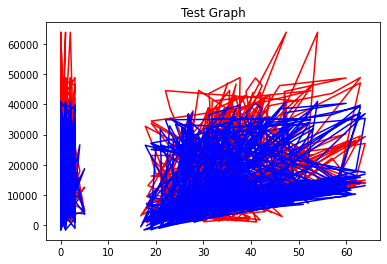

In [33]:
plt.plot(sc_x.inverse_transform(x_test),sc_y.inverse_transform(y_test),"r")
plt.plot(sc_x.inverse_transform(x_test),sc_y.inverse_transform(lin_reg.predict(x_test)),"b")
plt.title("Test Graph")
plt.show()

In [64]:
lin_train_score=lin_reg.score(x_train,y_train)
lin_test_score=lin_reg.score(x_test,y_test)

In [34]:
print("Train score: ",lin_reg.score(x_train,y_train))
print("Test score: ",lin_reg.score(x_test,y_test))

Train score:  0.7417049283233981
Test score:  0.7833463107364536


## Polynomial regression

In [35]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg=PolynomialFeatures(degree=4)
x_poly=poly_reg.fit_transform(x_train)
lin_reg1=LinearRegression()
lin_reg1.fit(x_poly,y_train)

LinearRegression()

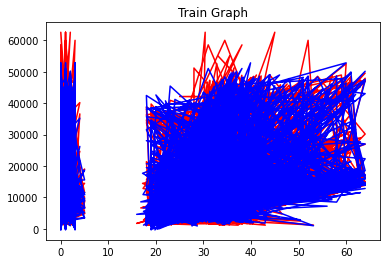

In [40]:
plt.plot(sc_x.inverse_transform(x_train),sc_y.inverse_transform(y_train),"r")
plt.plot(sc_x.inverse_transform(x_train),sc_y.inverse_transform(lin_reg1.predict(x_poly)),"b")
plt.title("Train Graph")
plt.show()

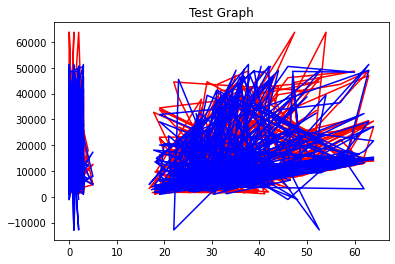

In [41]:
plt.plot(sc_x.inverse_transform(x_test),sc_y.inverse_transform(y_test),"r")
plt.plot(sc_x.inverse_transform(x_test),sc_y.inverse_transform(lin_reg1.predict(poly_reg.transform(x_test))),"b")
plt.title("Test Graph")
plt.show()

In [65]:
poly_train_score=lin_reg1.score(poly_reg.transform(x_train),y_train)
poly_test_score=lin_reg1.score(poly_reg.transform(x_test),y_test)

In [42]:
print("Train score: ",lin_reg1.score(poly_reg.transform(x_train),y_train))
print("Test score: ",lin_reg1.score(poly_reg.transform(x_test),y_test))

Train score:  0.864047438448646
Test score:  0.7714128476382929


## SVR

In [53]:
from sklearn.svm import SVR
svr_reg=SVR(kernel="rbf")
svr_reg.fit(x_train,y_train)

C:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

In [58]:
y_pred_train=svr_reg.predict(x_train)
y_pred_train=y_pred_train.reshape(len(y_pred_train),1)

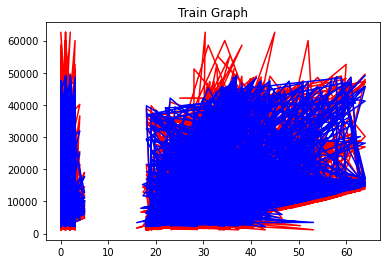

In [59]:
plt.plot(sc_x.inverse_transform(x_train),sc_y.inverse_transform(y_train),"r")
plt.plot(sc_x.inverse_transform(x_train),sc_y.inverse_transform(y_pred_train),"b")
plt.title("Train Graph")
plt.show()

In [60]:
y_pred_test=svr_reg.predict(x_test)
y_pred_test=y_pred_test.reshape(len(y_pred_test),1)

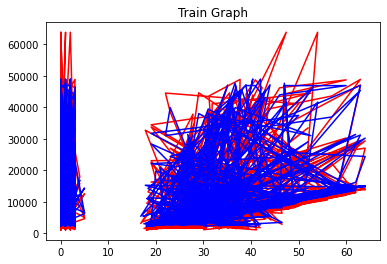

In [61]:
plt.plot(sc_x.inverse_transform(x_test),sc_y.inverse_transform(y_test),"r")
plt.plot(sc_x.inverse_transform(x_test),sc_y.inverse_transform(y_pred_test),"b")
plt.title("Train Graph")
plt.show()

In [66]:
svr_train_score=svr_reg.score(x_train,y_train)
svr_test_score=svr_reg.score(x_test,y_test)

In [63]:
print("Train score: ",svr_reg.score(x_train,y_train))
print("Test score: ",svr_reg.score(x_test,y_test))

Train score:  0.853019407600873
Test score:  0.8651114652585701


## Decision Tree

In [67]:
from sklearn.tree import DecisionTreeRegressor
tree_reg=DecisionTreeRegressor(random_state=42)
tree_reg.fit(x_train,y_train)

DecisionTreeRegressor(random_state=42)

In [68]:
y_pred_train=tree_reg.predict(x_train)
y_pred_train=y_pred_train.reshape(len(y_pred_train),1)

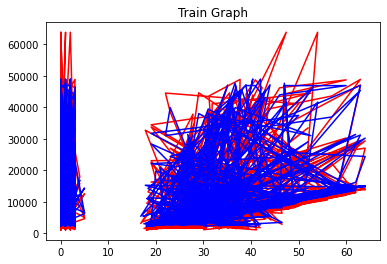

In [69]:
plt.plot(sc_x.inverse_transform(x_test),sc_y.inverse_transform(y_test),"r")
plt.plot(sc_x.inverse_transform(x_test),sc_y.inverse_transform(y_pred_test),"b")
plt.title("Train Graph")
plt.show()

In [70]:
y_pred_test=tree_reg.predict(x_test)
y_pred_test=y_pred_test.reshape(len(y_pred_test),1)

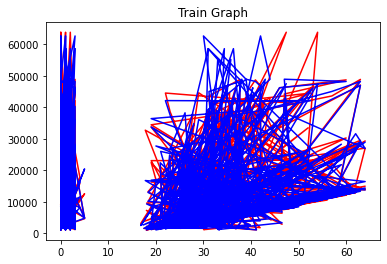

In [71]:
plt.plot(sc_x.inverse_transform(x_test),sc_y.inverse_transform(y_test),"r")
plt.plot(sc_x.inverse_transform(x_test),sc_y.inverse_transform(y_pred_test),"b")
plt.title("Train Graph")
plt.show()

In [72]:
tree_train_score=tree_reg.score(x_train,y_train)
tree_test_score=tree_reg.score(x_test,y_test)

In [73]:
print("Train score: ",tree_reg.score(x_train,y_train))
print("Test score: ",tree_reg.score(x_test,y_test))

Train score:  0.9983078124756305
Test score:  0.7096866119814552


In [74]:
train_score=[lin_train_score,poly_train_score,svr_train_score,tree_train_score]
model=["Linear Regression","Polynomial Regression","SVR","Decision Tree"]

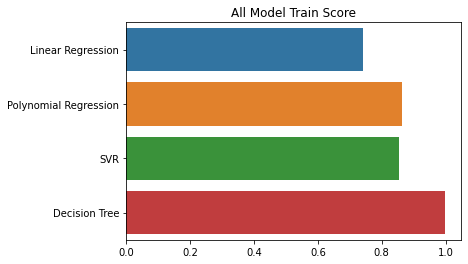

In [76]:
sns.barplot(y=model,x=train_score)
plt.title("All Model Train Score")
plt.show()

In [77]:
test_score=[lin_test_score,poly_test_score,svr_test_score,tree_test_score]

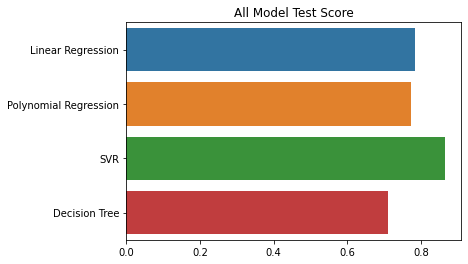

In [78]:
sns.barplot(y=model,x=test_score)
plt.title("All Model Test Score")
plt.show()